In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report,roc_auc_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [6]:
def split_train_test(df):
    train_set, test_set = train_test_split(df, test_size=0.25, random_state=72)
    train_set_x=train_set.drop(columns=['Loan_Status'])
    train_set_y= train_set['Loan_Status']
    test_set_x=test_set.drop(columns=['Loan_Status'])
    test_set_y= test_set['Loan_Status']
    return train_set_x, train_set_y, test_set_x, test_set_y

def ver_metricas(set, predict_set):
   print('Recall score:', recall_score(set, predict_set))
   print('Precision score:', precision_score(set, predict_set))
   print('F1 score:', f1_score(set, predict_set))
   print('Accuracy score:', accuracy_score(set, predict_set))
   print('------------------------------------------------------')
   table=confusion_matrix(set, predict_set)
   sns.heatmap(table, cmap='Blues',annot=True,fmt='g')
   plt.xlabel('Predicted')
   plt.ylabel('True')
   print(classification_report(set, predict_set))

In [7]:
df=pd.read_csv('./loan_data.csv')

In [8]:
df.dropna(inplace=True)

In [9]:
df.drop('Loan_ID', axis=1, inplace=True)

In [10]:
df['Loan_Status'] = df['Loan_Status'].replace('N', 0)
df['Loan_Status'] = df['Loan_Status'].replace('Y', 1)

In [11]:
df=pd.get_dummies(df, columns=['Gender', 'Married','Education', 'Self_Employed','Property_Area','Dependents'], drop_first=True)

In [12]:
train_set_x, train_set_y, test_set_x, test_set_y= split_train_test(df)

In [13]:
print('Train set: ',len(train_set_x))
print('Test set: ',len(test_set_x))

Train set:  231
Test set:  77


Logistic regression

Recall score: 0.9811320754716981
Precision score: 0.8253968253968254
F1 score: 0.8965517241379309
Accuracy score: 0.8441558441558441
------------------------------------------------------


              precision    recall  f1-score   support

           0       0.93      0.54      0.68        24
           1       0.83      0.98      0.90        53

    accuracy                           0.84        77
   macro avg       0.88      0.76      0.79        77
weighted avg       0.86      0.84      0.83        77



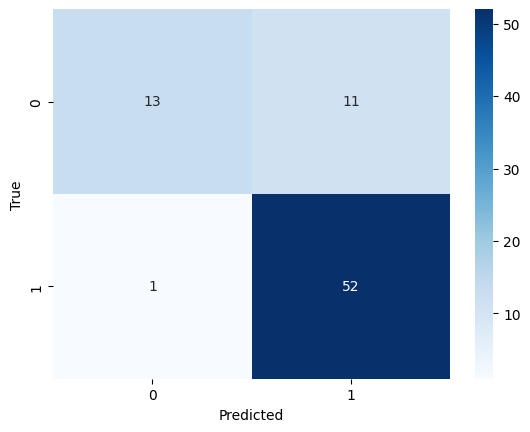

In [14]:
log_regression = LogisticRegression(random_state=45)
log_regression.fit(train_set_x, train_set_y)
log_reg_predict = log_regression.predict(test_set_x)
ver_metricas(test_set_y,log_reg_predict)

Decision tree

Recall score: 0.7924528301886793
Precision score: 0.7924528301886793
F1 score: 0.7924528301886793
Accuracy score: 0.7142857142857143
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        24
           1       0.79      0.79      0.79        53

    accuracy                           0.71        77
   macro avg       0.67      0.67      0.67        77
weighted avg       0.71      0.71      0.71        77



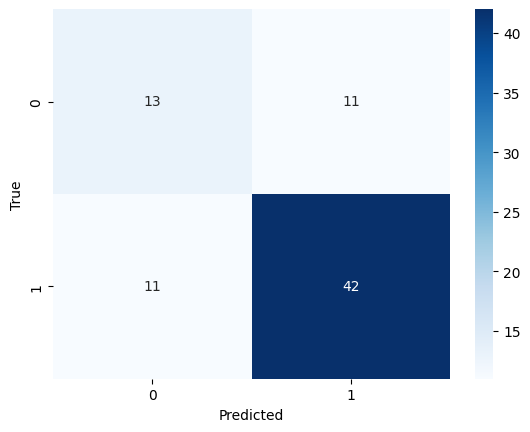

In [15]:
tree = DecisionTreeClassifier(random_state=3) 
tree.fit(train_set_x, train_set_y)
tree_predict_y= tree.predict(test_set_x)
ver_metricas(test_set_y,tree_predict_y)

Random forest

Recall score: 0.9433962264150944
Precision score: 0.8333333333333334
F1 score: 0.8849557522123894
Accuracy score: 0.8311688311688312
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.58      0.68        24
           1       0.83      0.94      0.88        53

    accuracy                           0.83        77
   macro avg       0.83      0.76      0.78        77
weighted avg       0.83      0.83      0.82        77



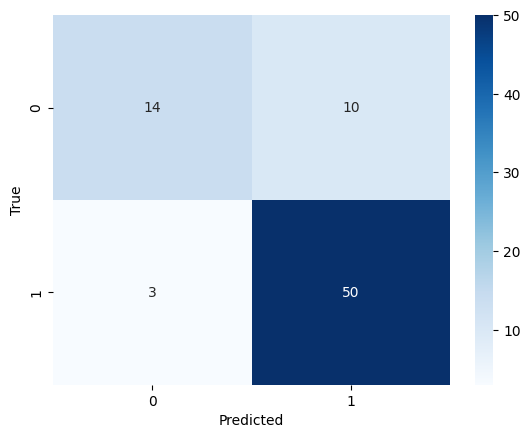

In [16]:
random_forest=RandomForestClassifier(random_state=43)
random_forest.fit(train_set_x, train_set_y)
randon_forest_predict=random_forest.predict(test_set_x)
ver_metricas(test_set_y,randon_forest_predict)

KNN

Recall score: 0.7924528301886793
Precision score: 0.7
F1 score: 0.743362831858407
Accuracy score: 0.6233766233766234
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.35      0.25      0.29        24
           1       0.70      0.79      0.74        53

    accuracy                           0.62        77
   macro avg       0.53      0.52      0.52        77
weighted avg       0.59      0.62      0.60        77



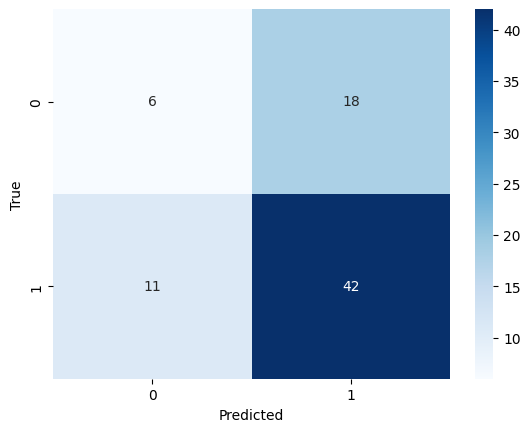

In [17]:
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(train_set_x, train_set_y)
KNN_Classifier_predict=KNN_Classifier.predict(test_set_x)
ver_metricas(test_set_y,KNN_Classifier_predict)

Ada Boost

Recall score: 0.9622641509433962
Precision score: 0.8360655737704918
F1 score: 0.8947368421052632
Accuracy score: 0.8441558441558441
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        24
           1       0.84      0.96      0.89        53

    accuracy                           0.84        77
   macro avg       0.86      0.77      0.80        77
weighted avg       0.85      0.84      0.83        77



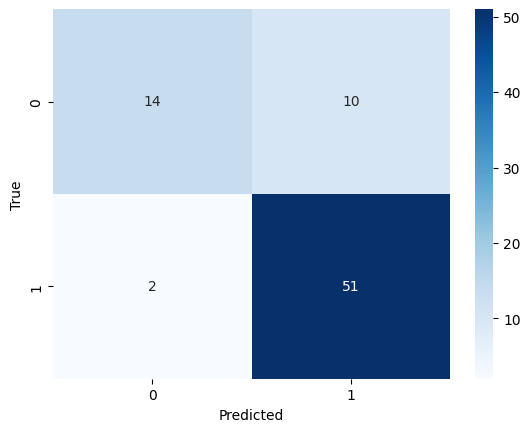

In [18]:
aboost_model = AdaBoostClassifier(n_estimators=15, random_state=0)
aboost_model.fit(train_set_x, train_set_y)
aboost_predict=aboost_model.predict(test_set_x)
ver_metricas(test_set_y, aboost_predict)

Gradient Boosting

Recall score: 0.9245283018867925
Precision score: 0.8448275862068966
F1 score: 0.8828828828828829
Accuracy score: 0.8311688311688312
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.62      0.70        24
           1       0.84      0.92      0.88        53

    accuracy                           0.83        77
   macro avg       0.82      0.77      0.79        77
weighted avg       0.83      0.83      0.83        77



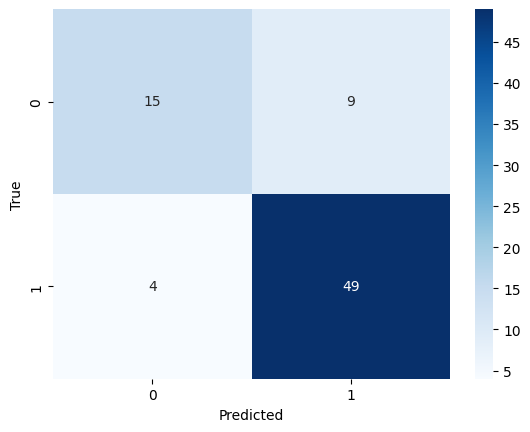

In [19]:
gboost_model = GradientBoostingClassifier(random_state=17)
gboost_model.fit(train_set_x, train_set_y)
gboost_predict=gboost_model.predict(test_set_x)
ver_metricas(test_set_y, gboost_predict)